In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#read in data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [5]:
#custom panda configuration to enable seeing all columns
pd.set_option('display.max_columns', len(train.columns))

### Exploring the data

In [6]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [7]:
#some info on the training and testing datasets
print(train.info())
print("")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB
None


From the above we can see that the training dataset has 9557 entries and 143 columns (which includes the 'Target' feature which needs to be predicted). Out of those columns, 8 are floats, 130 are ints and 5 are objects (which we'll cover later). We can also see that the testing dataset contains 23856, and has 142 columns (exluding the Target label we want to predict).


#### Important remark about the scoring!  
Note that ONLY the heads of household are used in scoring. All household members are included in test + the sample submission, but only heads of households are scored.

In the proposal we quickly covered the class imbalance. Below we will visualize this.
Below is an example of how the data is skewed towards '4' (non-vulnerable households).

In [8]:
# Helper method we will be using more often.
def visualize_class_imbalance(pd_series, title, xlabel='Poverty label', ylabel='Count'):
    pd_series.plot.bar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    pd_series

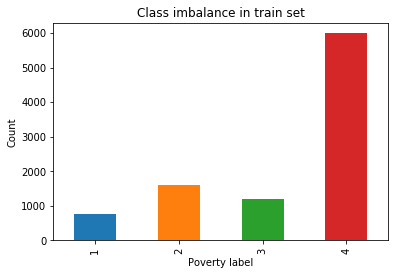

In [9]:
visualize_class_imbalance(pd_series=train['Target'].groupby(train['Target']).size(),title='Class imbalance in train set',xlabel='Poverty label',ylabel='Count')

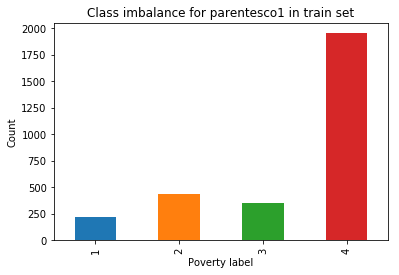

In [10]:
visualize_class_imbalance(pd_series=train.loc[train['parentesco1'] == 1]['Target'].groupby(train['Target']).size(),title='Class imbalance for parentesco1 in train set',xlabel='Poverty label',ylabel='Count')

In [11]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

In [12]:
def print_variance_per_poverty_level(df,poverty_level,display_count=5,threshold=1):
    tmp_df = df.loc[df['Target'] == poverty_level].var().sort_values()
    print("Displaying values for Target label {}".format(poverty_level))
    print("Displaying n={} smallest variance".format(display_count))
    print(tmp_df.nsmallest(n=display_count))
    print("Displaying n={} largest variance".format(display_count))
    print(tmp_df.nlargest(n=display_count))
    print("Number of features which have a variance < {}: {}".format(threshold,len(tmp_df[tmp_df < threshold])))
    print("")

In [13]:
# Variance in data
print_variance_per_poverty_level(train,1)
print_variance_per_poverty_level(train,2)
print_variance_per_poverty_level(train,3)
print_variance_per_poverty_level(train,4)

Displaying values for Target label 1
Displaying n=5 smallest variance
Target       0.0
elimbasu6    0.0
elimbasu5    0.0
elimbasu4    0.0
planpri      0.0
dtype: float64
Displaying n=5 largest variance
v2a1           2.699352e+09
SQBage         2.724160e+06
agesq          2.724160e+06
SQBmeaned      4.814558e+03
SQBescolari    2.038775e+03
dtype: float64
Number of features which have a variance < 1: 107

Displaying values for Target label 2
Displaying n=5 smallest variance
Target       0.0
elimbasu6    0.0
elimbasu5    0.0
techootro    0.0
pisoother    0.0
dtype: float64
Displaying n=5 largest variance
v2a1           2.901013e+09
agesq          3.497418e+06
SQBage         3.497418e+06
SQBmeaned      4.952545e+03
SQBescolari    2.153733e+03
dtype: float64
Number of features which have a variance < 1: 110

Displaying values for Target label 3
Displaying n=5 smallest variance
Target         0.0
paredfibras    0.0
paredother     0.0
pisoother      0.0
pisonatur      0.0
dtype: float64
Disp

In [14]:
# Variance in data for head of households
print_variance_per_poverty_level(train.loc[train['parentesco1'] == 1],1)
print_variance_per_poverty_level(train.loc[train['parentesco1'] == 1],2)
print_variance_per_poverty_level(train.loc[train['parentesco1'] == 1],3)
print_variance_per_poverty_level(train.loc[train['parentesco1'] == 1],4)

Displaying values for Target label 1
Displaying n=5 smallest variance
Target          0.0
paredother      0.0
estadocivil1    0.0
techootro       0.0
parentesco11    0.0
dtype: float64
Displaying n=5 largest variance
v2a1           2.718419e+09
agesq          2.571900e+06
SQBage         2.571900e+06
SQBmeaned      4.537634e+03
SQBescolari    2.210175e+03
dtype: float64
Number of features which have a variance < 1: 112

Displaying values for Target label 2
Displaying n=5 smallest variance
Target          0.0
techocane       0.0
parentesco12    0.0
parentesco11    0.0
parentesco10    0.0
dtype: float64
Displaying n=5 largest variance
v2a1           2.793820e+09
agesq          3.608650e+06
SQBage         3.608650e+06
SQBmeaned      5.420938e+03
SQBescolari    2.128501e+03
dtype: float64
Number of features which have a variance < 1: 112

Displaying values for Target label 3
Displaying n=5 smallest variance
Target          0.0
parentesco11    0.0
paredother      0.0
parentesco12    0.0
tech

Although not conclusive (and ignoring the Target label), it looks like there is a lot of data which has a low variance. Roughly 110 features exhibit a variance lower then 1. This will make it harder for the model to learn from the data.

### Preparing the data

#### Data types

In [15]:
#inspect the object columns to see what they represent
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


From description of features:

| column name | description | action |
| :--- | :--- | :--- |
|Id| rowId | nothing |
| idhogar | Household level identifier | nothing |
| dependency | calculated = (number of members of the household younger then 19 or older then 64)/(number of members of household between 19 and 64) | remap no to 0 and yes to 1 |
| edjefe | years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 | remap no to 0 and yes to 1 |
| edjefa | years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0| remap no to 0 and yes to 1 |



In [16]:
#remap objects, float type for dependency due to calculation
mapping = {'yes':1,'no':0}
for df in [train,test]:
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)

In [17]:
# Check if any of the above columns are actually integers and not floats
def find_non_integer_for_column(df,column_name):
    for name, value in df[column_name].iteritems():
        if not value.is_integer():
            print("Found non-integer for column {}".format(column_name))
            return
    print("All values are integers for column {}".format(column_name))
find_non_integer_for_column(train,'dependency')
find_non_integer_for_column(train,'edjefe')
find_non_integer_for_column(train,'edjefa')

find_non_integer_for_column(test,'dependency')
find_non_integer_for_column(test,'edjefe')
find_non_integer_for_column(test,'edjefa')

Found non-integer for column dependency
All values are integers for column edjefe
All values are integers for column edjefa
Found non-integer for column dependency
All values are integers for column edjefe
All values are integers for column edjefa


In [18]:
#restructure data types for given columns
for df in [train,test]:
    df['edjefe'] = df['edjefe'].astype(np.int32)
    df['edjefa'] = df['edjefa'].astype(np.int32)

#### Head of household

The checking and removal of households without a head was an idea from Will Koehrsen. His notebook submission for the competition can be found here: https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough. I added a check for looking if there are households with multiple heads.

In [19]:
# Creditize or refactor
# Check if there are households without a head and remove them
households_head = train.groupby('idhogar')['parentesco1'].sum()
# sum of household should be 0 if there is no head of household
households_no_head = train.loc[train['idhogar'].isin(households_head[households_head == 0].index), :]
print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

# Check if there are households with multiple heads (how to deal with that if there are multiple labels?)
households_multiple_heads = train.loc[train['idhogar'].isin(households_head[households_head > 1].index), :]
print('There are {} households with multiple heads!'.format(households_multiple_heads['idhogar'].nunique()))


There are 15 households without a head.
There are 0 households with multiple heads!


In [20]:
households_no_head

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
4935,ID_717302050,NaN,0,8,0,1,1,0,NaN,0,2,2,0,2,2,0,4,4,4,4,6,NaN,4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,09b195e7a,2,2,0,4,1.000000,6,0,6.000000,0,0,1,0,0,0,0,0,0,5,0.800000,1,0,0,0,0,0,1,1,4,1,0,0,0,0,0,0,1,34,36,1156,16,36,4,0.640000,1.000000,36.000000,1156,3
4975,ID_ff6f13458,NaN,0,4,0,1,1,0,NaN,1,1,2,0,2,2,1,3,4,4,4,9,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,896fe6d3e,2,2,0,4,1.000000,9,0,7.500000,0,0,0,0,0,1,0,0,0,2,2.000000,1,0,0,0,0,0,0,1,3,1,0,0,0,0,0,0,1,16,81,256,16,81,4,4.000000,1.000000,56.250000,256,3
5391,ID_64c9eabac,NaN,0,5,0,1,1,0,NaN,0,1,1,0,2,2,0,3,3,3,3,14,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,61c10e099,0,3,0,3,0.000000,6,0,8.666667,0,0,0,0,0,0,0,1,0,3,1.000000,1,0,0,0,0,0,0,1,3,1,0,0,0,0,0,0,1,20,196,400,9,36,0,1.000000,0.000000,75.111115,400,3
5396,ID_8948b1f91,90000.0,0,5,0,1,1,0,NaN,2,1,3,1,1,2,3,2,5,5,5,3,0.0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,374ca5a19,3,2,0,5,1.500000,6,0,8.500000,0,1,0,0,0,0,0,0,0,3,1.666667,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,0,1,10,9,100,25,36,9,2.777778,2.250000,72.250000,100,3
6443,ID_8ddb34d2c,NaN,0,3,0,1,1,0,NaN,1,1,2,0,2,2,1,3,4,4,4,0,0.0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,bfd5067c2,2,2,0,4,1.000000,3,0,6.000000,1,0,0,0,0,0,0,0,0,2,2.000000,1,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,1,7,0,49,16,9,4,4.000000,1.000000,36.000000,49,3
6444,ID_03e2f23b0,NaN,0,3,0,1,1,0,NaN,1,1,2,0,2,2,1,3,4,4,4,6,0.0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,bfd5067c2,2,2,0,4,1.000000,3,0,6.000000,0,0,1,0,0,0,0,0,0,2,2.000000,1,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,1,13,36,169,16,9,4,4.000000,1.000000,36.000000,169,3
7086,ID_ba2ac56bb,NaN,0,4,0,1,1,0,NaN,0,1,1,2,2,4,2,3,5,5,5,11,NaN,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1367ab31d,3,2,0,5,1.500000,16,0,18.000000,0,0,0,0,1,0,0,0,0,2,2.500000,1,0,0,0,0,0,0,1,3,0,0,1,0,0,0,0,1,19,121,361,25,256,9,6.250000,2.250000,324.000000,361,3
7438,ID_7ba374a80,NaN,0,4,0,1,1,0,NaN,0,3,3,0,1,1

In [21]:
train_new = train.drop(households_no_head.index.values)

#small sanity check
assert ((len(train) - len(train_new)) == len(households_no_head)),"This should never happen!"

train_new.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10,0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12,0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11,0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11,0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [22]:
def get_missing(df):
    """
    Analyze missing values in dataframe:
    """
    # Number of missing in each column
    missing = pd.DataFrame(df.isnull().sum()).rename(columns = {0: 'total'})
    # Create a percentage missing
    missing['percent'] = missing['total'] / len(df)
    # Drop columns where everything is present
    missing = missing[missing.total != 0]
    return missing

In [23]:
missing = get_missing(train_new)
#Display
table_df = missing.sort_values('percent', ascending = False)
table_df

,total,percent
rez_esc,7921,0.830816
v18q1,7319,0.767674
v2a1,6843,0.717747
meaneduc,5,0.000524
SQBmeaned,5,0.000524


### rez_esc -  Years behind in school
Information on discussion board about this value: https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403#361066  
> This variable is only collected for people between 7 and 19 years of age and it is the difference between the years of education a person should have and the years of education he/she has. it is capped at 5.

In [24]:
# Check for anomalies regarding the capping
print("Individuals who have more 5 years of difference for education: {}".format(len(train_new[train_new['rez_esc'] > 5])))

Individuals who have more 5 years of difference for education: 0


In [25]:
# Check for anomalies regarding the range
rez_esc_tmp = train_new[((train_new['age'] < 7) | (train_new['age'] > 18))]
rez_esc_tmp = rez_esc_tmp[(rez_esc_tmp['rez_esc'] != 0) & (rez_esc_tmp['rez_esc'].notnull())]
rez_esc_tmp.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


In [26]:
rez_esc_tmp = train_new[((train_new['age'] < 7) | (train_new['age'] > 18))]
rez_esc_tmp = rez_esc_tmp[rez_esc_tmp['rez_esc'].isnull()]
rez_esc_tmp.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10,0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12,0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11,0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11,0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,121,1444,16,121,4,1.777778,1.0,121.0,1444,4


In [27]:
# Transform all occurences of 'rez_esc' to 0 where age is < 7 or > 19, as there is no data collected for these age groups
def correct_rez_esc(df):
    df.loc[((df['age'] > 18) | (df['age'] < 7)) & (df['rez_esc'].isnull()), 'rez_esc'] = 0

In [28]:
correct_rez_esc(train_new)
correct_rez_esc(test)

In [29]:
# Check the missing variables after the change
missing = get_missing(train_new)
missing.sort_values('percent', ascending = False)

,total,percent
v18q1,7319,0.767674
v2a1,6843,0.717747
rez_esc,180,0.018880
meaneduc,5,0.000524
SQBmeaned,5,0.000524


180
Total amount of null values for rez_esc for age 18: 179
Total amount of individuals with age 18: 179


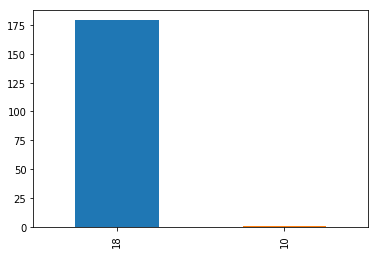

In [30]:
#See what's left
print(len(train_new[train_new['rez_esc'].isnull()]))
train_new[(train_new['rez_esc'].isnull() & train_new['parentesco1'] == 1)].head()
rez_esc_tmp = train_new[['rez_esc','age','escolari']]
rez_esc_tmp = rez_esc_tmp.loc[(rez_esc_tmp['rez_esc'].isnull())]
rez_esc_tmp['age'].value_counts().plot(kind='bar')
print("Total amount of null values for rez_esc for age 18: {}".format(len(rez_esc_tmp.loc[(rez_esc_tmp['age'] == 18)])))
print("Total amount of individuals with age 18: {}".format(len(train_new.loc[(train_new['age'] == 18)])))

In [31]:
# all values for 'rez_esc' are missing for individuals with age 18...
print("Total amount of individuals with age 17: {}".format(len(train_new.loc[(train_new['age'] == 17)])))
rez_esc_tmp = train_new.loc[(train_new['rez_esc'].notnull()) & (train_new['age'] == 17)]
rez_esc_tmp[['rez_esc','age','escolari']].describe()

Total amount of individuals with age 17: 173


,rez_esc,age,escolari
count,173.000000,173.0,173.000000
mean,1.468208,17.0,8.641618
std,1.557195,0.0,1.687472
min,0.000000,17.0,5.000000
25%,0.000000,17.0,7.000000
50%,1.000000,17.0,9.000000
75%,3.000000,17.0,10.000000
max,5.000000,17.0,11.000000


In [32]:
# Decided to fill data with representative information from the closest younger age group (age = 17)
def correct_rez_esc_18(df):
    df.loc[df['age'] == 18, 'rez_esc'] = df.loc[df['age'] == 17]['rez_esc'].mean()

In [33]:
# Update values
correct_rez_esc_18(train_new)
correct_rez_esc_18(test)

In [34]:
# Check the missing variables after the change
missing = get_missing(train_new)
missing.sort_values('percent', ascending = False)

,total,percent
v18q1,7319,0.767674
v2a1,6843,0.717747
meaneduc,5,0.000524
SQBmeaned,5,0.000524
rez_esc,1,0.000105


In [35]:
# Apply same logic for the remaining 10yo, however there should be a mean there
print("Total amount of null values for rez_esc for age 10: {}".format(len(train_new.loc[(train_new['age'] == 10) & (train_new['rez_esc'].isnull())])))
print("Total amount of individuals with age 10: {}".format(len(train_new.loc[(train_new['age'] == 10)])))
train_new.loc[(train_new['age'] == 10)][['rez_esc','age','escolari']].describe()

Total amount of null values for rez_esc for age 10: 1
Total amount of individuals with age 10: 135


,rez_esc,age,escolari
count,134.000000,135.0,135.000000
mean,0.164179,10.0,3.155556
std,0.428216,0.0,0.771379
min,0.000000,10.0,0.000000
25%,0.000000,10.0,3.000000
50%,0.000000,10.0,3.000000
75%,0.000000,10.0,4.000000
max,3.000000,10.0,4.000000


In [36]:
# Use mean for 10yo's to update the value
def correct_rez_esc_10(df):
    df.loc[(df['age'] == 10) & (df['rez_esc'].isnull()), 'rez_esc'] = df.loc[df['age'] == 10]['rez_esc'].mean()

In [37]:
correct_rez_esc_10(train_new)
correct_rez_esc_10(test)

In [38]:
# Check the missing variables after the change
missing = get_missing(train_new)
missing.sort_values('percent', ascending = False)

,total,percent
v18q1,7319,0.767674
v2a1,6843,0.717747
meaneduc,5,0.000524
SQBmeaned,5,0.000524


Test dataset still has 3 values which are missing, setting them to 0

In [39]:
def correct_rez_esc_test(df):
        df.loc[(df['rez_esc'].isnull()),'rez_esc'] = 0

In [40]:
correct_rez_esc_test(test)

### v18q1 - number of tablets household owns
Information on the discussion board about this variable: https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403#360609
Corresponding features: 'v18q': owns a tablet

In [41]:
#Check if count is related to households not owning a tablets
v18q1_tmp = train_new[(train_new['v18q'] == 0 & train_new['v18q1'].isnull())]
print('Individuals that do not own a tablet and v18q1 is null: {}'.format(len(v18q1_tmp)))
if(len(v18q1_tmp) == missing.loc['v18q1'].total):
    print('All values not owning a tablet matches the null count')

Individuals that do not own a tablet and v18q1 is null: 7319
All values not owning a tablet matches the null count


In [42]:
#Set all missing values for 'v18q1' to 0
def correct_v18q1(df):
    df['v18q1'] = df['v18q1'].fillna(0)

In [43]:
correct_v18q1(train_new)
correct_v18q1(test)

In [44]:
#Check for currently missing values after update on 'v18q1'
missing = get_missing(train_new)
missing.sort_values('percent', ascending = False)

,total,percent
v2a1,6843,0.717747
meaneduc,5,0.000524
SQBmeaned,5,0.000524


### v2a1 - Monthly rent payment

Information on the discussion board about this variable: https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403#360609

Variables which seemingly have something to do with house ownership:  
tipovivi1, =1 own and fully paid house  
tipovivi2, "=1 own,  paying in installments"  
tipovivi3, =1 rented  
tipovivi4, =1 precarious  
tipovivi5, "=1 other(assigned,  borrowed)"  

In [45]:
# Check how many of the missing variables match the count of 'tipovivi1'
v2a1_tmp = train_new[(train_new['v2a1'].isnull() & train_new['tipovivi1'] == 1)]
len(v2a1_tmp)

5897

In [46]:
# set 'v2a1' to 0 where 'tipovivi1' == 1
def correct_v2a1(df):
    df.loc[df['tipovivi1'] == 1, 'v2a1'] = 0

In [47]:
correct_v2a1(train_new)
correct_v2a1(test)

In [48]:
#Check for currently missing values after update on 'v2a1'
missing = get_missing(train_new)
missing.sort_values('percent', ascending = False)

,total,percent
v2a1,946,0.099224
meaneduc,5,0.000524
SQBmeaned,5,0.000524


https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403#360694
> Hi Nathan, there are two ways to approach these cases. In the example of v2a1 you should first filter by tipoviv3. Most households that don't have information will be households that do not rent or are not paying loans (tipoviv2). If a household is tipoviv3 and does not have information then you need to make a choice about the treatment of the variable either assume 0, impute a value or not use the variable. Basically in those cases we don't know the value.

tipovivi2 action: if value is 1 then set to v2a1 0  
tipovivi3 action: if value is 1 then set v2a1 to mean (?) and set new column flag for unknown to 1

In [49]:
# Check where current nan's are present in regard to each tipovivi
train_new.loc[(train_new['v2a1'].isnull())][['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']].describe()

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
count,946.0,946.0,946.0,946.000000,946.000000
mean,0.0,0.0,0.0,0.172304,0.827696
std,0.0,0.0,0.0,0.377845,0.377845
min,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,1.000000
50%,0.0,0.0,0.0,0.000000,1.000000
75%,0.0,0.0,0.0,0.000000,1.000000
max,0.0,0.0,0.0,1.000000,1.000000


In [50]:
# Further inspect tipovivi4 and tipovivi5 as these seem to contain all missing values
print(len(train_new.loc[train_new['tipovivi4'] == 1]))
print(len(train_new.loc[(train_new['v2a1'].isnull() & train_new['tipovivi4'] == 1)]))
print(len(train_new.loc[train_new['tipovivi5'] == 1]))
print(len(train_new.loc[(train_new['v2a1'].isnull() & train_new['tipovivi5'] == 1)]))

163
163
783
783


In [51]:
# All v2a1 values of tipovivi 4 and 5 are NaN. Setting all values to 0 for tipovivi 4 & 5
def correct_v2a1_tipovivi(df,column_name):
    df.loc[(df[column_name] == 1, 'v2a1')] = 0

In [52]:
correct_v2a1_tipovivi(train_new,'tipovivi4')
correct_v2a1_tipovivi(train_new,'tipovivi5')
correct_v2a1_tipovivi(test,'tipovivi4')
correct_v2a1_tipovivi(test,'tipovivi5')

In [53]:
#Check for currently missing values after update on 'v2a1'
missing = get_missing(train_new)
missing.sort_values('percent', ascending = False)

,total,percent
meaneduc,5,0.000524
SQBmeaned,5,0.000524


### meaneduc AND SQBmeaned
- meaneduc: average years of education for adults (18+)  
- SQBmeaned: square of the mean years of education of adults (>=18) in the household

In [54]:
# get the records and display them
train_new.loc[(train_new['meaneduc'].isnull())].head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
1291,ID_bd8e11b0f,0.0,0,7,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,10,1.468208,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1b31fd159,1,0,0,1,8.0,0,10,NaN,0,0,0,1,0,0,0,0,0,5,0.2,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,18,100,324,1,0,1,0.04,64.0,NaN,324,4
1840,ID_46ff87316,110000.0,0,1,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,2,6,1.468208,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,a874b7ce7,2,0,0,2,8.0,4,0,NaN,0,0,1,0,0,0,0,0,0,1,2.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,18,36,324,4,16,4,4.00,64.0,NaN,324,4
1841,ID_69f50bf3e,110000.0,0,1,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,2,4,1.468208,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,a874b7ce7,2,0,0,2,8.0,4,0,NaN,0,1,0,0,0,0,0,0,0,1,2.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,18,16,324,4,16,4,4.00,64.0,NaN,324,4
2049,ID_db3168f9f,180000.0,0,3,0,1,1,0,0.0,0,2,2,0,0,0,0,2,2,2,2,12,0.000000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,faaebf71a,2,0,0,2,8.0,12,0,NaN,0,0,0,0,0,0,1,0,0,2,1.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,144,361,4,144,4,1.00,64.0,NaN,361,4
2050,ID_2a7615902,180000.0,0,3,0,1,1,0,0.0,0,2,2,0,0,0,0,2,2,2,2,12,0.000000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,faaebf71a,2,0,0,2,8.0,12,0,NaN,0,0,0,0,0,0,1,0,0,2,1.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,144,361,4,144,4,1.00,64.0,NaN,361,4


In [55]:
train_new.loc[(train_new['age'] == 18)].head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
11,ID_de822510c,100000.0,0,3,0,1,1,0,0.0,0,0,0,0,2,2,0,2,2,2,2,12,1.468208,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,bb2094100,1,1,0,2,1.00,0,11,23.000000,0,0,0,0,0,0,1,0,0,2,1.0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,144,324,4,0,1,1.0,1.0000,529.000000,324,4
111,ID_642ae6a8d,200000.0,0,5,0,1,1,0,0.0,1,2,3,0,3,3,1,5,6,6,6,7,1.468208,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,c179fa326,2,4,1,6,1.00,14,0,11.500000,0,0,0,1,0,0,0,0,0,3,2.0,0,0,1,0,0,0,1,1,4,1,0,0,0,0,0,1,0,18,49,324,36,196,4,4.0,1.0000,132.250000,324,4
144,ID_912ff9986,0.0,1,3,1,1,1,0,0.0,0,8,8,0,2,2,0,10,10,10,10,6,1.468208,10,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,63f11d6ea,1,9,1,10,0.25,0,5,7.777778,0,0,1,0,0,0,0,0,0,2,5.0,1,0,0,0,0,0,0,1,5,1,0,0,0,0,0,1,0,18,36,324,100,0,1,25.0,0.0625,60.493824,324,4
285,ID_2be4f2db1,0.0,0,3,0,1,1,0,0.0,0,2,2,1,3,4,1,5,6,6,6,8,1.468208,6,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6833ac5dc,4,2,0,6,2.00,0,7,13.500000,0,0,0,1,0,0,0,0,0,2,3.0,0,0,0,1,0,0,1,1,4,1,0,0,0,0,0,1,0,18,64,324,36,0,16,9.0,4.0000,182.250000,324,2
289,ID_6dea84d09,0.0,0,3,0,1,1,0,0.0,0,2,2,1,3,4,1,5,6,6,6,6,1.468208,6,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6833ac5dc,4,2,0,6,2.00,0,7,13.500000,0,0,1,0,0,0,0,0,0,2,3.0,0,0,0,1,0,0,1,1,4,1,0,0,0,0,0,1,0,18,36,324,36,0,16,9.0,4.0000,182.250000,324,2


In [56]:
train_new.loc[(train_new['idhogar'] == 'a874b7ce7')][['idhogar','meaneduc','age','escolari']].head()

,idhogar,meaneduc,age,escolari
1840,a874b7ce7,NaN,18,6
1841,a874b7ce7,NaN,18,4


In [57]:
# Dirty workaround, meaneduc is the average of the HOUSEHOLD... 
# Complexity wise, I've decided to simply fill it with the value present in escolari for the INDIVIDUAL
# Additionally, the square of the mean will be applied to the SQBMEAN as the nan's are for the same records

def correct_meaneduc_and_sqbmeaned(df):
    df.loc[(df['meaneduc'].isnull()),'meaneduc'] = df['escolari']
    df.loc[(df['SQBmeaned'].isnull()),'SQBmeaned'] = df['meaneduc'] ** 2

In [58]:
correct_meaneduc_and_sqbmeaned(train_new)
correct_meaneduc_and_sqbmeaned(test)

In [59]:
# Check the missing variables after the change
missing = get_missing(train_new)
missing.sort_values('percent', ascending = False)

,total,percent


### Getting data ready for usage

In [60]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.feature_selection import VarianceThreshold

# Fixing a random seed
import random
random.seed(42)

# Sampling data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [61]:
# Only pick data of household heads (parentesco1 == 1) and drop columns which are not used for predicting
y = train_new.loc[(train_new['parentesco1'] == 1)]['Target']
X = train_new.loc[(train_new['parentesco1'] == 1)].drop(['Target','Id','idhogar'], axis=1)
test_drp = test.drop(['Id','idhogar'], axis=1)

#### Feature selection

In [62]:
len(X.columns)

140

In [63]:
sel = VarianceThreshold(threshold=1.0)
sel = sel.fit(X)
remaining_columns_ix = sel.get_support(indices=True)
X_train_transformed = sel.transform(X)
test_transformed = sel.transform(test_drp)
# sel, X = format_selector(sel,X)

In [64]:
print(len(remaining_columns_ix))
print(remaining_columns_ix)

28
[  0   2  10  13  15  16  17  18  19  21  94  95  97  98  99 100 101 121
 130 131 132 133 134 135 136 137 138 139]


#### Sampling
Due to the class imbalance, care has to be taken in sampling the data. Earlier stages of this process revealed that all predictions were simply made on the class which had the most data represented. First attempt that will be made is to undersample the overrepesented class.

In [65]:
smp = RandomUnderSampler(random_state=42)
X_res, y_res = smp.fit_sample(X_train_transformed, y)

In [66]:
np.unique(y_res, return_counts=True)

(array([1, 2, 3, 4]), array([222, 222, 222, 222]))

In [67]:
to_series = pd.DataFrame.from_records(np.unique(y_res, return_counts=True),columns=['1','2','3','4']).drop(0)

In [68]:
transposed = pd.DataFrame.transpose(to_series)

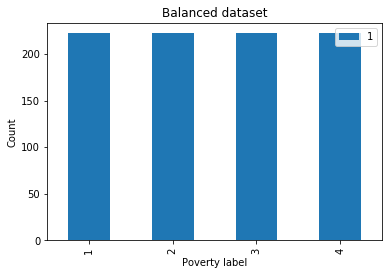

In [69]:
visualize_class_imbalance(transposed,title='Balanced dataset')

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### Implement Benchmark Model (Random Forest)

In [69]:
# Method to help run models
def run_random_forest(classifier,dX_train,dy_train,dX_test,dy_test):
    classifier.fit(dX_train, dy_train)
    best_train_predictions = classifier.predict(dX_train)
    best_test_predictions = classifier.predict(dX_test)
    
    # Calculate the macro-f1_score of the model.
    print('The training macro F1 Score is', f1_score(best_train_predictions, dy_train,average="macro"))
    print('The testing macro F1 Score is', f1_score(best_test_predictions, dy_test,average="macro"))

In [71]:
# imports
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

In [71]:
# Simple out of the box benchmarking model
clf = RandomForestClassifier(n_estimators=1000,random_state=42)
run_random_forest(clf,X_train,y_train,X_test,y_test)

The training macro F1 Score is 1.0
The testing macro F1 Score is 0.359223066831


In [72]:
# Attempt to see if model can be optimized, from Udacity lesson on model selection - Grid Search
parameters = {'min_samples_leaf':[1,2,4,8,10], 'min_samples_split':[2,4,6,8,10]}
scorer = make_scorer(f1_score,average="macro")
clf = RandomForestClassifier(n_estimators=1000,random_state=42)
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

In [73]:
best_clf = grid_fit.best_estimator_
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [74]:
run_random_forest(best_clf,X_train,y_train,X_test,y_test)
# Parameters ended up being used in the new model.

The training macro F1 Score is 0.866200303867
The testing macro F1 Score is 0.40720973623


In [75]:
train_sizes_abs, train_scores, test_scores = learning_curve(best_clf,X,y)

In [76]:
# From Udacity course on model selection : cross-validation
def visualize_learning_curve(train_scores, test_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.grid()
    
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")
    
    
    plt.legend(loc="best")
    
    plt.show()

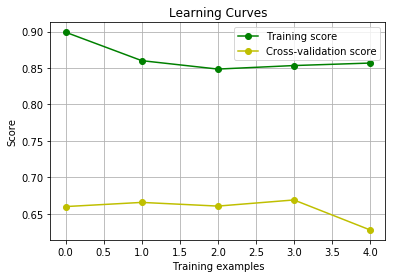

In [77]:
visualize_learning_curve(train_scores, test_scores)

From the above image we can see that the Random Forest Classifier is overfitting the data.

### Implement a DNN

In [1]:
# imports
from keras import metrics
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, LeakyReLU
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential

from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [73]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
y_train_encoded = onehot_encoder.fit_transform(y_train.reshape(len(y_train), 1))
y_test_encoded = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print(y_train_encoded)
print(y_train_encoded.shape)

[[ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 ..., 
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]]
(710, 4)


#### Architecture

In [74]:
model = Sequential()

model.add(Dense(256, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(512 ,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(256 ,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128 ,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64 ,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(y_train_encoded.shape[1], activation='relu')) # back to one-hot-encoded result

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               7424      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
__________

In [81]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.categorical_accuracy])
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=0, save_best_only=True, mode='max')
callbacks = [checkpoint]

In [82]:
model_result = model.fit(X_train, y_train_encoded,batch_size=100,validation_data=(X_test,y_test_encoded), epochs=1000,shuffle=True, callbacks=callbacks, verbose=0)

In [83]:
# See which keys are available
model_result.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

#### Visualisation of model training

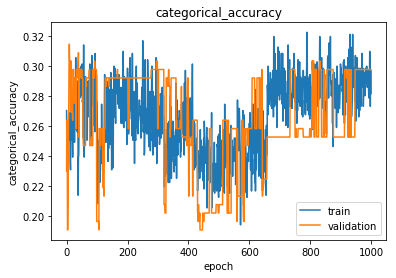

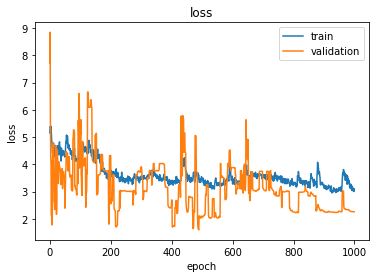

In [84]:
#Some visualization to see model has any overfitting (Though it cant as this got handled by early stopping criteria)

plt.plot(model_result.history['categorical_accuracy'])
plt.plot(model_result.history['val_categorical_accuracy'])
plt.title('categorical_accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()


plt.plot(model_result.history['loss'])
plt.plot(model_result.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [85]:
#load in best weights
model.load_weights("weights.best.hdf5")

In [86]:
# Make predictions
predictions = model.predict(X_test)

In [87]:
# Inspect predictions
predictions

array([[ 0.        ,  0.        ,  0.12562862,  0.84138769],
       [ 0.        ,  0.63296402,  0.        ,  0.        ],
       [ 0.        ,  0.40614864,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.43343663,  1.72207618],
       [ 0.        ,  1.10721385,  0.        ,  0.        ],
       [ 0.        ,  1.10113442,  0.        ,  0.        ],
       [ 0.        ,  1.11041152,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.12562862,  0.84138769],
       [ 0.        ,  1.10252011,  0.        ,  0.        ],
       [ 0.        ,  1.02262628,  0.        ,  0.        ],
       [ 0.        ,  1.05781424,  0.        ,  0.        ],
       [ 0.        ,  1.06398225,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.06448913,  0.2699959 ],
       [ 0.        ,  1.05751443,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.08058666,  1.71374834],
       [ 0.        ,  1.01334703,  0.        ,  0.        ],
       [ 0.        ,  0.

In [88]:
# Keep highest estimate
(predictions == predictions.max(axis=1)[:,None]).astype(float)

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  

In [89]:
# Practice run for turning predictions back with the encoder
recovered_y = (predictions == predictions.max(axis=1)[:,None]).astype(float).dot(onehot_encoder.active_features_).astype(int)

In [90]:
print(len((predictions == predictions.max(axis=1)[:,None]).astype(float)))
print(len((y_test_encoded)))
recovered_y

178
178


array([ 4,  2,  2,  4,  2,  2,  2,  4,  2,  2,  2,  2,  3,  2,  4,  2,  2,
        4,  4,  2,  2,  2,  4,  2,  4,  2,  2,  2,  2,  4,  2,  2,  4,  2,
        2,  2,  2,  2,  2,  2,  2,  4,  2,  2,  4,  2,  2,  2,  4,  2,  4,
        2,  2,  4,  2,  2,  2,  2,  4,  4,  2,  2,  2,  2,  2,  2,  2,  4,
        2,  2,  2,  4,  4,  4,  4,  2,  4,  2,  2,  4,  4,  4,  2,  2,  2,
        2,  2,  2,  4,  4,  2,  4,  2,  4,  2,  2,  2,  4,  2,  2,  2,  4,
       10,  2,  2,  2,  2,  2,  2,  4,  2,  2,  2,  2,  2,  2,  4,  2,  2,
        2,  2,  4,  4,  2,  2,  4,  2,  2,  2,  4,  2,  2,  4,  4,  2,  2,
        4,  2,  2,  4,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  4,  2,  4,  2,
        4,  2,  4,  2,  2,  2,  2,  2])

#### macro F1 score

Below is the macro f1 score for the Deep Neural Network. One remark is that this result can vary a lot between runs. Running the same code again is no guarentee the same results gets put out. Attempts were made to stabilize the output, but regardless the score might differ.

In [91]:
f1score = f1_score((predictions == predictions.max(axis=1)[:,None]).astype(float),y_test_encoded,average='macro')
print(f1score)

0.224292468761


### Submission

#### Random Forest

In [92]:
random_forest_predictions = best_clf.predict(test_transformed)

In [93]:
rf_first = pd.DataFrame(test['Id'])
rf_second = pd.DataFrame(random_forest_predictions,columns=['Target'])
rf_third = pd.concat([rf_first, rf_second], axis=1)

In [94]:
rf_third.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,1


In [95]:
rf_third.to_csv('random_forest_submission.csv',index=False,header=False)

#### Deep Neural Network

In [96]:
dnn_predictions = model.predict(test_transformed)
recovered_dnn_predictions = (dnn_predictions == dnn_predictions.max(axis=1)[:,None]).astype(float).dot(onehot_encoder.active_features_).astype(int)

In [97]:
dnn_first = pd.DataFrame(test['Id'])
dnn_second = pd.DataFrame(recovered_dnn_predictions,columns=['Target'])
dnn_third = pd.concat([dnn_first, dnn_second], axis=1)

In [98]:
dnn_third.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,2
4,ID_a62966799,4


In [99]:
dnn_third.to_csv('dnn_submission.csv',index=False,header=False)

## Additional measurements

In [100]:
%%script false

UsageError: %%script is a cell magic, but the cell body is empty.


Above kills script execution, no extra rows (not even comments) can be used otherwise it will simply continue

In [ ]:
dnn_f1_scores = []
filepath="comparison.weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=0, save_best_only=True, mode='max')
callbacks = [checkpoint]
for x in range(100):
    model.fit(X_train, y_train_encoded,batch_size=100,validation_data=(X_test,y_test_encoded), epochs=100,shuffle=True, verbose=0)
    predictions = model.predict(X_test)
    f1score = f1_score((predictions == predictions.max(axis=1)[:,None]).astype(float),y_test_encoded,average='macro')
    dnn_f1_scores.append(f1score)
    print("F1 score Run {}: {}".format(x+1,f1score))

In [ ]:
dnn_f1_Df = pd.DataFrame(dnn_f1_scores)

In [ ]:
dnn_f1_Df.describe()

In [ ]:
dnn_f1_Df.plot.kde().legend().set_visible(False)

In [77]:
# Visualize the DNN

from keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True, show_layer_names=True)

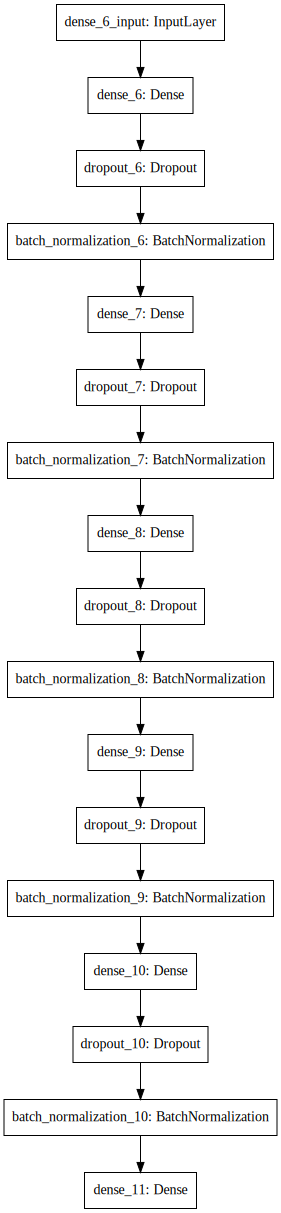

In [76]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))